In [1]:
r = 2
sigma = 10.0

r =  2
sigma =  10


In [2]:
lambda = [0.299, 0.587, 0.114; -0.14713, -0.28886, 0.436; 0.615, -0.51499, -0.10001]

lambda =

   0.29900   0.58700   0.11400
  -0.14713  -0.28886   0.43600
   0.61500  -0.51499  -0.10001



In [22]:
image = double(imread('stones_rgb.jpg'));
red_channel = reshape(image(:,:,1), [4096, 1]);
green_channel = reshape(image(:,:,2), [4096, 1]);
blue_channel = reshape(image(:,:,3), [4096, 1]);

In [4]:
C = [red_channel, green_channel, blue_channel];

In [5]:
W = zeros(4096,4096);

### Calculate W matrix

In [ ]:
for x_i=1:64
    for y_i=1:64
        for
        if (x != y && abs(x-y) <= r && abs())

In [145]:
denom = 2*power(sigma,2)

denom =  200


In [149]:
dist = C(2,:)' - C(1,:)'

dist =

  -1
  -7
  -7



In [155]:
weig = lambda * dist

weig =

  -5.20600
  -0.88285
   3.69000



In [165]:
for i=1:4096
    ti = i-1;
    tj = j-1;
    i
    for j=i:4096
        x_i = idivide(ti,64);
        y_i = mod(ti,64);
        x_j = idivide(tj,64)+1;
        y_j = mod(tj,64);
        if(y_i == 0)
            y_i = 64;
        endif
        if(y_j == 0)
            y_j = 64;
        endif
        if(x_i == 65)
            x_i = 64;
        endif
        if(x_j == 65)
            x_j = 64;
        endif

        if (i != j && abs(x_i-x_j) <= r && abs(y_i-y_j) <= r)
            C_i = C(i,:)';
            C_j = C(j,:)';
            dist = C_i - C_j;
            weighted_dist = lambda * dist;
            est = norm(weighted_dist .^ 2,2);
            likelihood = exp(-est/ denom);
            W(i,j) = likelihood;
            W(j,i) = likelihood;
        endif
    endfor
endfor

i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
i =  10
i =  11
i =  12
i =  13
i =  14
i =  15
i =  16
i =  17
i =  18
i =  19
i =  20
i =  21
i =  22
i =  23
i =  24
i =  25
i =  26
i =  27
i =  28
i =  29
i =  30
i =  31
i =  32
i =  33
i =  34
i =  35
i =  36
i =  37
i =  38
i =  39
i =  40
i =  41
i =  42
i =  43
i =  44
i =  45
i =  46
i =  47
i =  48
i =  49
i =  50
i =  51
i =  52
i =  53
i =  54
i =  55
i =  56
i =  57
i =  58
i =  59
i =  60
i =  61
i =  62
i =  63
i =  64
i =  65
i =  66
i =  67
i =  68
i =  69
i =  70
i =  71
i =  72
i =  73
i =  74
i =  75
i =  76
i =  77
i =  78
i =  79
i =  80
i =  81
i =  82
i =  83
i =  84
i =  85
i =  86
i =  87
i =  88
i =  89
i =  90
i =  91
i =  92
i =  93
i =  94
i =  95
i =  96
i =  97
i =  98
i =  99
i =  100
i =  101
i =  102
i =  103
i =  104
i =  105
i =  106
i =  107
i =  108
i =  109
i =  110
i =  111
i =  112
i =  113
i =  114
i =  115
i =  116
i =  117
i =  118
i =  119
i =  120
i =  121
i =  122
i =  123
i

Since it is a costly operation, I saved weights.

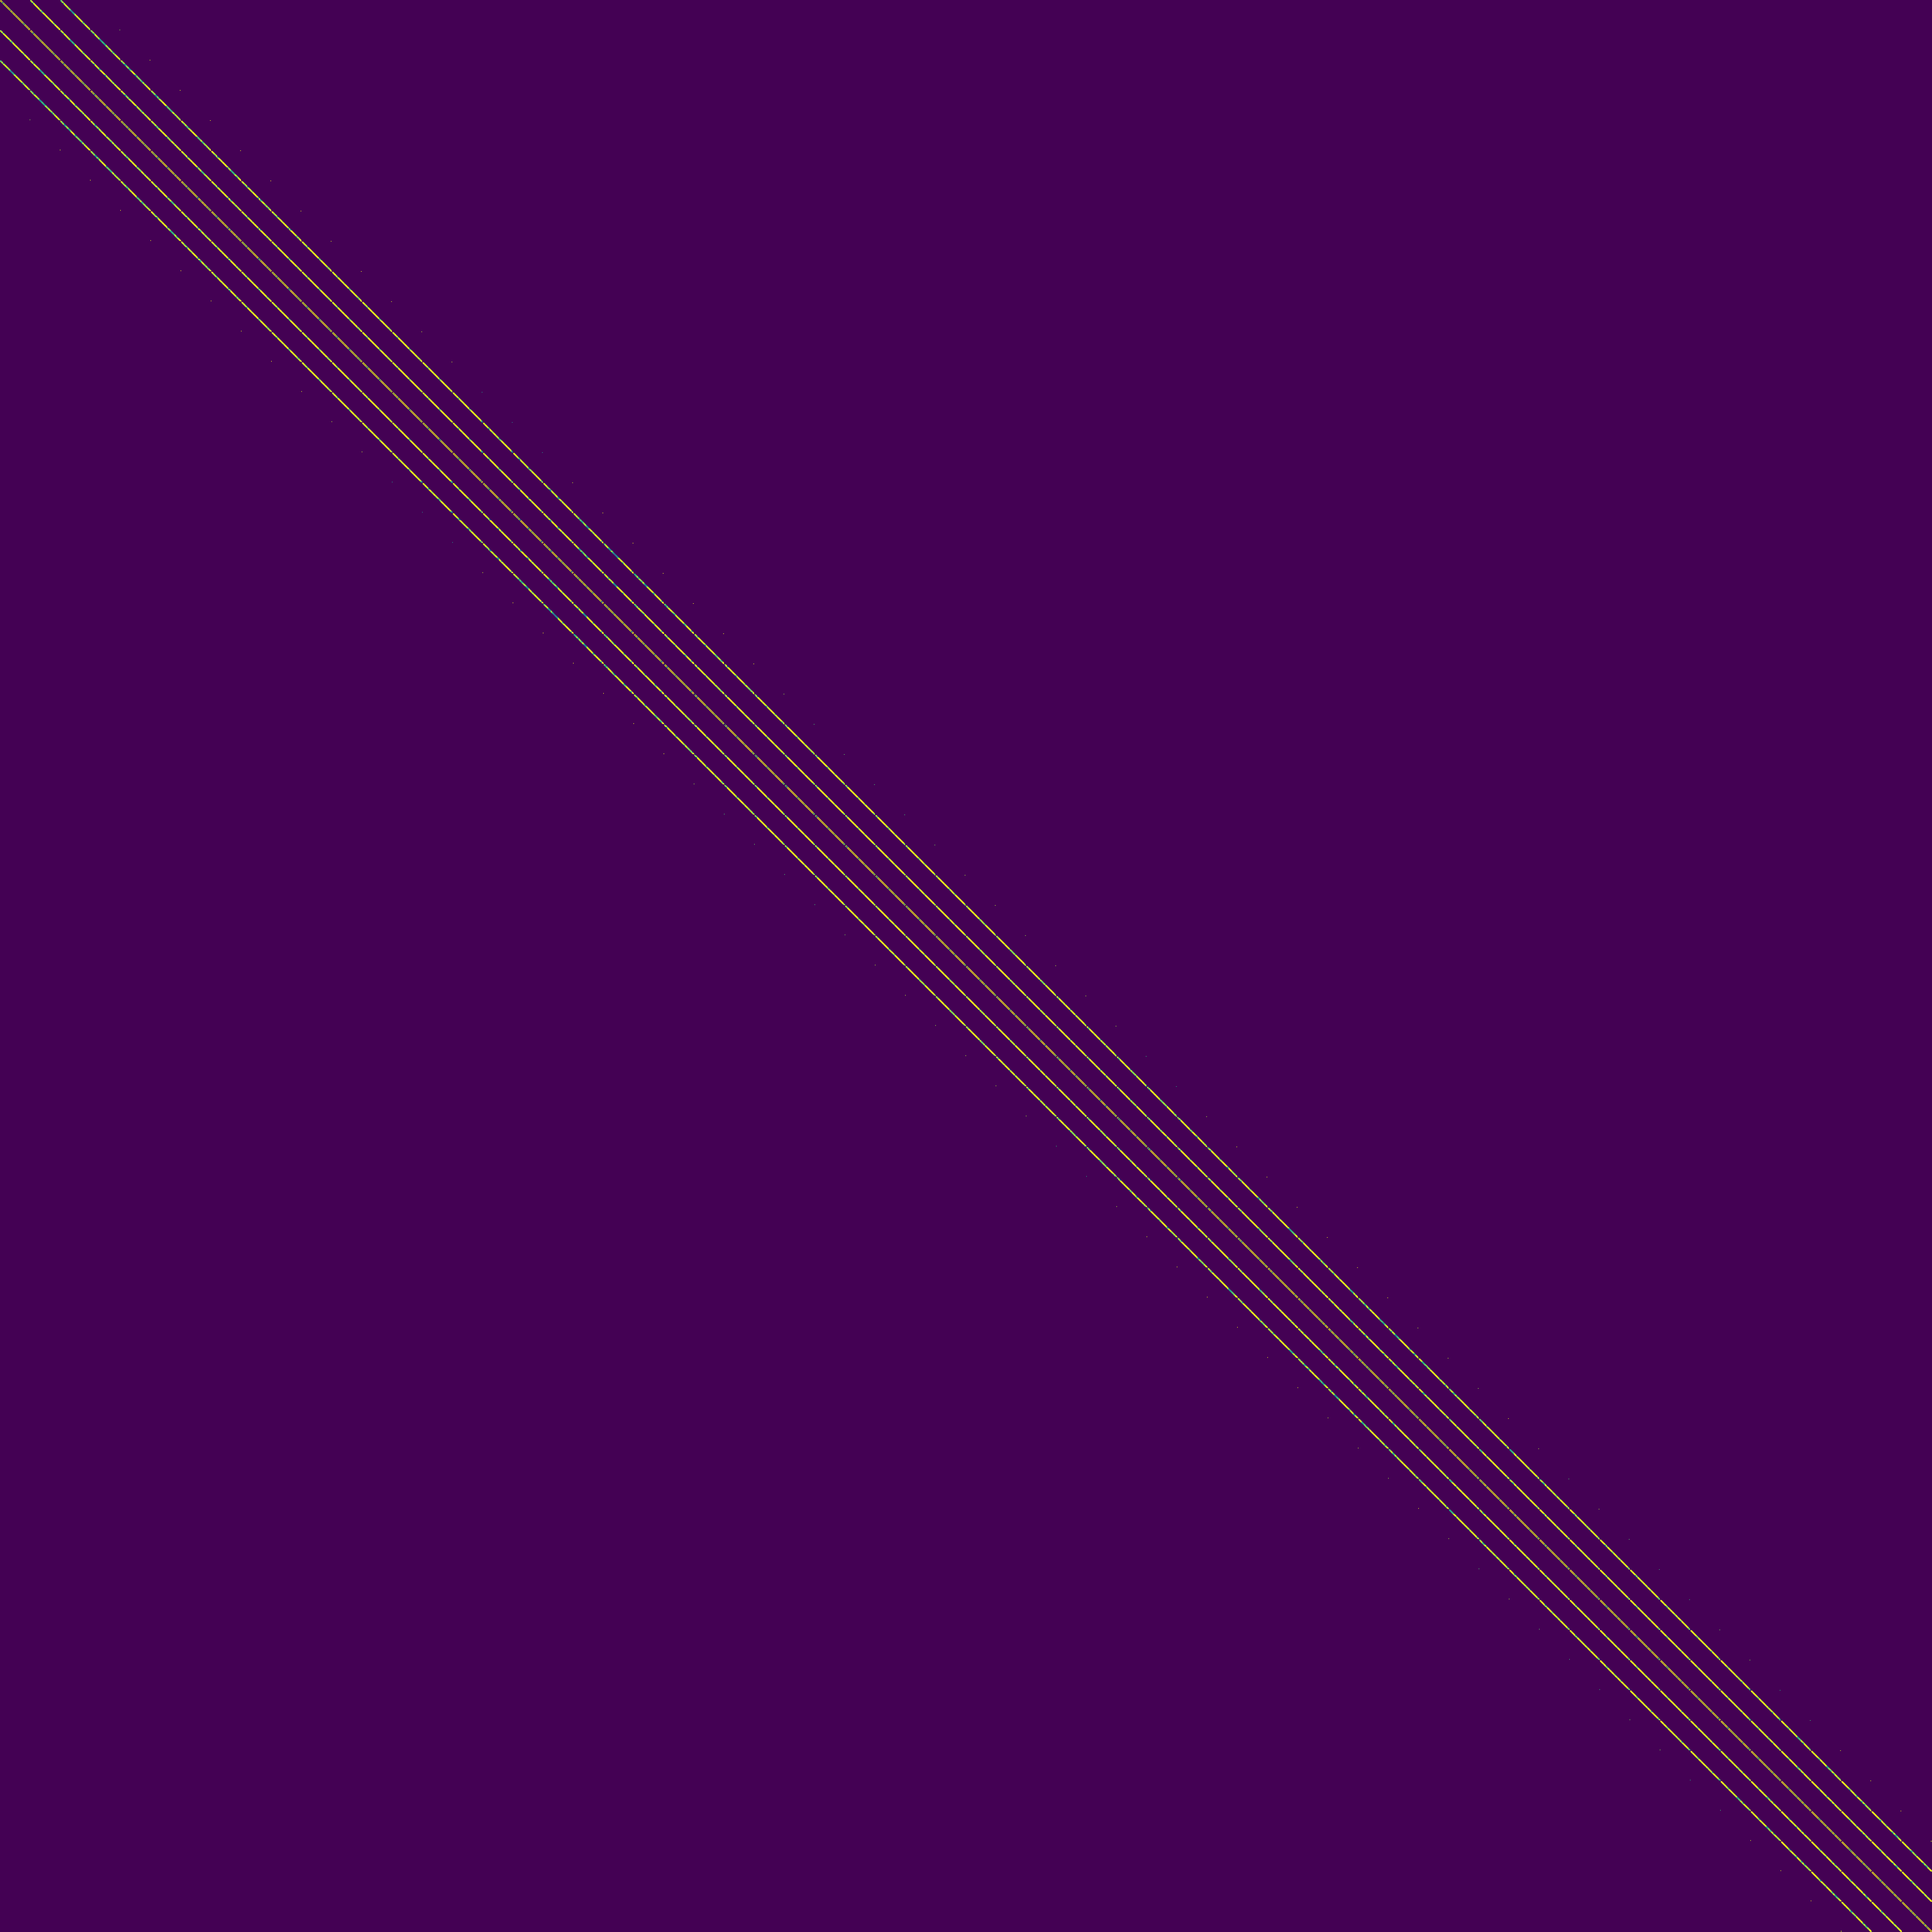

In [138]:
imagesc(W)

In [166]:
D = zeros(4096);

Calculate diagonal degree matrix.

In [167]:
for i=1:4096
    D(i,i) = sum(W(i,:));
endfor

Calculate Laplacian matrix.

In [168]:
L = D^(-1/2) * W * D^(-1/2);

In [169]:
[Q, R] = qr(L);

Q = Q(:,1:5);

### Simultaneous iteration

In [170]:
for i=1:1000
    K = L * Q;
    [Q, R] = qr(K,0);
endfor
R

R =

   0.99997  -0.00057   0.00000  -0.00000   0.00000
   0.00000   0.99751  -0.00007  -0.00001   0.00000
   0.00000   0.00000   0.98921   0.00281   0.00065
   0.00000   0.00000   0.00000   0.98764  -0.00122
   0.00000   0.00000   0.00000   0.00000   0.98503



In [171]:
V = D^(-1/2) * Q;

In [172]:
original = imread('stones_rgb.jpg');

In [125]:
idivide(499,64)

ans =  7


In [179]:
cluster1 = zeros(64,64,3);
cluster2 = zeros(64,64,3);
for i=1:4096
    x = mod(i,64);
    if x==0
        x = 64;
    endif
    y = idivide(i,64)+1;
    if y==65
        y = 64;
    endif
    p_i = V(i,3);
    if p_i < 0
        cluster1(x,y,:) = original(x,y,:);
        cluster2(x,y,:) = 0;
    else
        cluster2(x,y,:) = original(x,y,:);
        cluster1(x,y,:) = 0;
    end
endfor

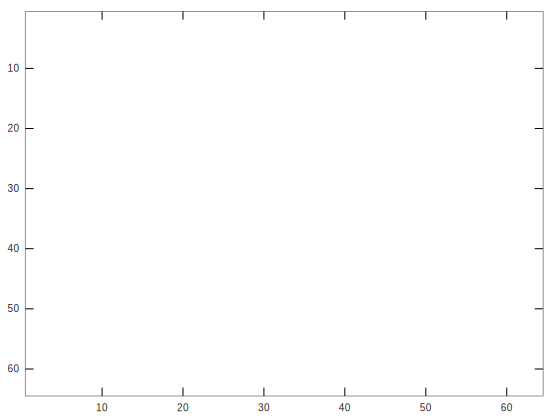

In [180]:
imagesc(cluster1)